In [1]:
#required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#reading the data set
data=pd.read_csv("Mobile_data.csv")
data

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


# EDA

In [3]:
#describing
data.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [4]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [5]:
#checking null
data.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [6]:
#correlation
corr=data.corr()
corr

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.200723
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.006606
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.021998
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,0.044435
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,0.000853
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,-0.030302
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,0.004399
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,0.033599
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645,0.148858
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818


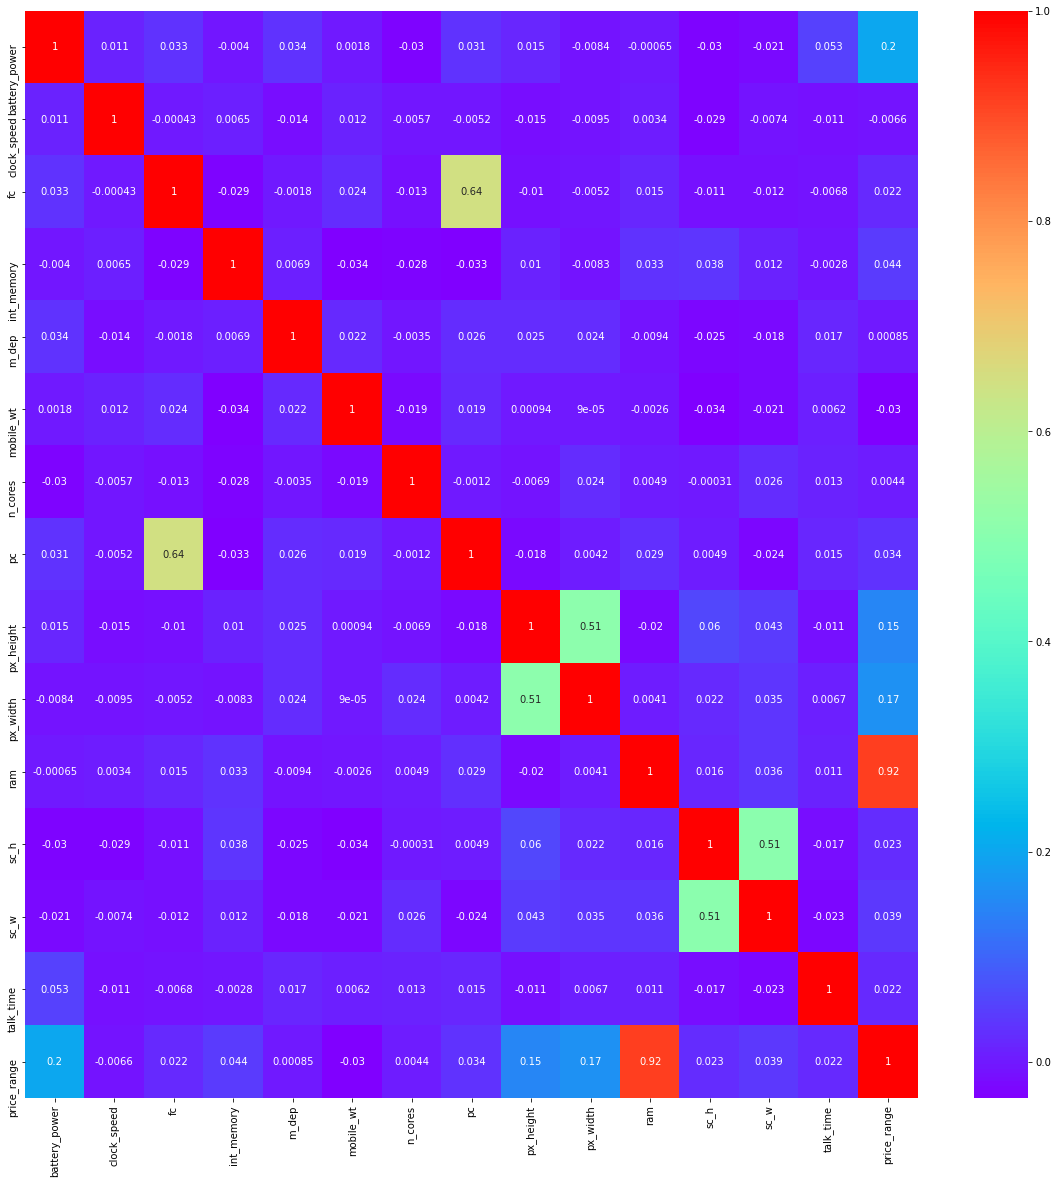

In [7]:
#heatmap
plt.figure(figsize=(20,20))
sb.heatmap(corr,annot=True,cmap='rainbow',linecolor='yellow')

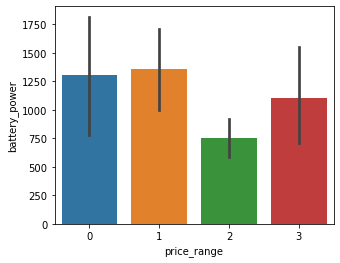

In [47]:
#Basic Graphs
plt.figure(figsize=(5,4))
sb.barplot(y="battery_power",x="price_range",data=data.head(20))

In [9]:
#shape of data
data.shape

(2000, 15)

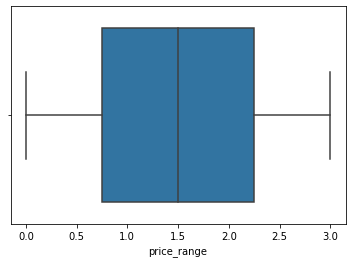

In [10]:
#Finding Outliers
sb.boxplot(data=data,x=data['price_range'])

there is no outliers

In [11]:
#x_ind,y_dep
from sklearn.model_selection import train_test_split

In [12]:
x_ind=data.drop("price_range",axis=1)
x_ind

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [13]:
y_dep=data.price_range
y_dep

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [14]:
#to make a data normal
from sklearn.preprocessing import StandardScaler

In [15]:
norm=StandardScaler()

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=4)

In [17]:
x_train=norm.fit_transform(x_train)

In [18]:
x_test=norm.fit_transform(x_test)
data.shape

(2000, 15)

In [19]:
#Building a model  #square root method for identifying k values
#distance metric methods 1) euclidean 2) Manhattan 3) Hamming
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=45,p=4,metric="manhattan")


In [20]:
knn_fit=KNN.fit(x_train,y_train)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [22]:
#prediction
y_pred=knn_fit.predict(x_test)

In [23]:
y_pred

array([3, 0, 1, 0, 2, 1, 3, 0, 3, 2, 3, 3, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0,
       2, 3, 3, 0, 0, 1, 3, 0, 1, 3, 2, 2, 1, 3, 0, 3, 3, 3, 2, 3, 0, 1,
       1, 1, 1, 3, 1, 3, 3, 0, 1, 1, 0, 0, 3, 3, 3, 1, 0, 1, 1, 1, 2, 1,
       3, 1, 2, 1, 0, 0, 0, 1, 0, 2, 2, 1, 1, 3, 0, 0, 3, 1, 2, 3, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 3, 2, 2, 2, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 3, 2, 1, 3, 1, 1, 2, 3, 2, 2, 0, 3, 3, 3, 1, 1, 0, 3, 3,
       1, 1, 3, 2, 0, 2, 3, 0, 3, 0, 1, 0, 2, 1, 3, 3, 2, 2, 1, 0, 3, 0,
       2, 0, 3, 0, 0, 1, 2, 0, 2, 2, 3, 0, 1, 1, 3, 3, 0, 2, 0, 1, 0, 0,
       0, 3, 2, 2, 1, 2, 2, 0, 0, 3, 1, 3, 2, 1, 1, 2, 0, 2, 1, 2, 1, 3,
       2, 0, 0, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2, 2, 0, 1, 1, 3, 0, 1, 0, 2,
       1, 1, 0, 1, 0, 2, 1, 3, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2, 1, 0, 3, 3,
       1, 1, 2, 1, 3, 0, 2, 0, 0, 0, 0, 2, 0, 3, 1, 2, 1, 2, 3, 3, 2, 0,
       2, 0, 3, 0, 0, 0, 1, 1, 1, 1, 3, 1, 1, 2, 1, 0, 3, 1, 2, 0, 2, 2,
       3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 1, 2,

In [24]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[91, 15,  0,  0],
       [ 7, 75, 19,  0],
       [ 0, 19, 60,  8],
       [ 0,  0, 24, 82]], dtype=int64)

In [25]:
acc=accuracy_score(y_test,y_pred)
acc

0.77

In [34]:
#error term method
error_rate=[]
for i in range(1,70):
    knn_new=KNeighborsClassifier(n_neighbors=i)
    knn_new.fit(x_train,y_train)
    pred1=knn_new.predict(x_test)
    error_rate.append(np.mean(pred1 !=y_test))

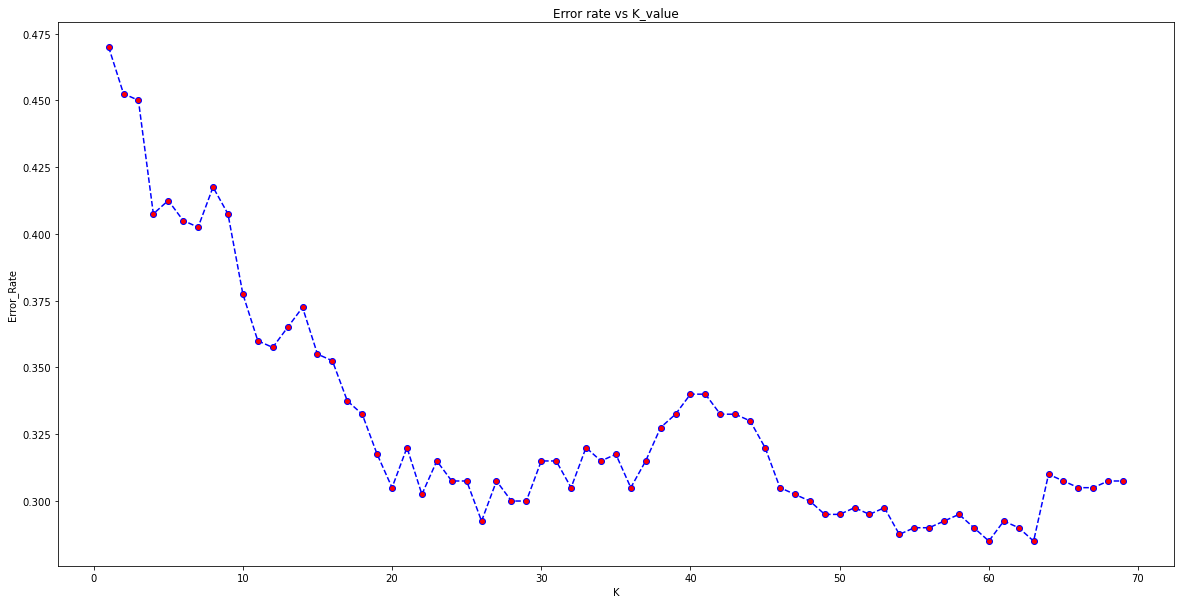

In [35]:
plt.figure(figsize=(20,10))
plt.plot(range(1,70),error_rate,color="blue",linestyle="dashed",
marker="o",markerfacecolor="red")
plt.title("Error rate vs K_value")
plt.xlabel("K")
plt.ylabel("Error_Rate");

In [39]:
KNN=KNeighborsClassifier(n_neighbors=63,p=4,metric="manhattan")
knn_fit=KNN.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=knn_fit.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[91, 15,  0,  0],
       [ 8, 73, 20,  0],
       [ 0, 16, 67,  4],
       [ 0,  0, 24, 82]], dtype=int64)

In [40]:
acc=accuracy_score(y_test,y_pred)

In [41]:
print("Accuracy of KNN model is {} %".format(round(acc*100)))

Accuracy of KNN model is 78.0 %
